# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from scipy.spatial.distance import correlation 

# Get the Data

In [2]:
#Read the movie.csv and ratings.csv files

ratings_data = pd.read_csv("movie data/ratings.csv",
                           index_col=False)
movies_data  = pd.read_csv("movie data/movies.csv",
                           index_col=False, usecols=[0,1])

#Merging movie and rating data
data = ratings_data.merge(movies_data,left_on = 'movieId', right_on = 'movieId')

data.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


# Data Visualization

In [3]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [4]:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


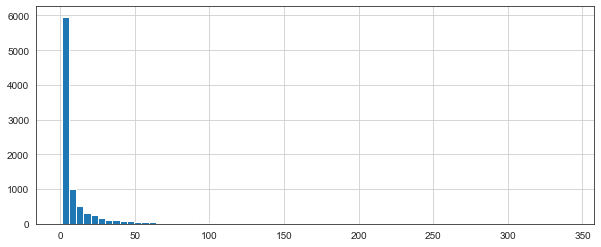

In [5]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

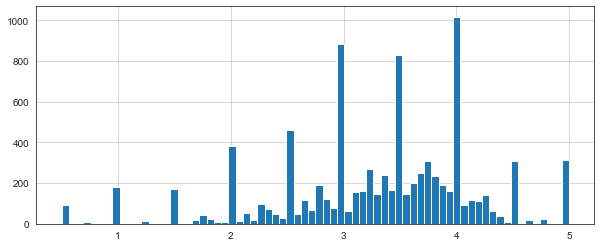

In [6]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [7]:
data_table = pd.pivot_table(data, values='rating',index ='userId',columns='title')

data_table.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Collaborative Filtering using corrwith() Method

In [8]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


Let's choose two movies:Forrest Gump and Jurassic Park

Now let's grab the user ratings for those two movies:

In [9]:
Forrest_Gump_user_ratings = data_table['Forrest Gump (1994)']
Jurassic_Park_user_ratings = data_table['Jurassic Park (1993)']
Forrest_Gump_user_ratings.head()

userId
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [10]:
similar_to_Forrest_Gump = data_table.corrwith(Forrest_Gump_user_ratings)
similar_to_Jurassic_Park = data_table.corrwith(Jurassic_Park_user_ratings)

C:\Users\nisch\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\nisch\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [11]:
corr_Forrest_Gump = pd.DataFrame(similar_to_Forrest_Gump,columns=['Correlation'])
corr_Forrest_Gump.dropna(inplace=True)
corr_Forrest_Gump.head()

,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [12]:
corr_Forrest_Gump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
$9.99 (2008),1.0
Say It Isn't So (2001),1.0
Metropolis (2001),1.0
"See No Evil, Hear No Evil (1989)",1.0
Middle Men (2009),1.0
Water for Elephants (2011),1.0
"Watch, The (2012)",1.0
Cheech & Chong's Next Movie (1980),1.0
Forrest Gump (1994),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [13]:
corr_Forrest_Gump = corr_Forrest_Gump.join(ratings['num of ratings'])
corr_Forrest_Gump.head()

,Correlation,num of ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


Now sort the values and notice how the titles make a lot more sense:

In [14]:
corr_Forrest_Gump[corr_Forrest_Gump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,341
"Beautiful Mind, A (2001)",0.575922,114
Ghost (1990),0.517176,126
Rain Man (1988),0.467367,119
"Truman Show, The (1998)",0.459342,137


Now the same for the comedy Jurassic_Park:

In [15]:
corr_Jurassic_Park = pd.DataFrame(similar_to_Jurassic_Park,columns=['Correlation'])
corr_Jurassic_Park.dropna(inplace=True)
corr_Jurassic_Park = corr_Jurassic_Park.join(ratings['num of ratings'])
corr_Jurassic_Park[corr_Jurassic_Park['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,274
Jumanji (1995),0.563320,107
E.T. the Extra-Terrestrial (1982),0.541445,160
Independence Day (a.k.a. ID4) (1996),0.496903,218
Indiana Jones and the Last Crusade (1989),0.489017,147


# Content Based Filtering using K Nearest Neighbor

In [16]:
data_table = pd.pivot_table(data, values='rating',index ='userId',columns='movieId')

data_table.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# To find the K nearest neighbors, the similarity between
# two users has to be found. Correlation function from
# 'scipy' library can be used for this purpose

def similarity(user1,user2):   
# Normalize the ratings of user1 and user2 by mean ratings of user1
# for any movie
    user1 = np.array(user1) - np.nanmean(user1)
    user2 = np.array(user2) - np.nanmean(user2)
# The similarty between two users is found only using the rating data
# for movies that has been rated by both the users in common

    cominItemId  = [i for i in range(len(user1)) if user1[i]>0 and user2[i]>0]

    if len(cominItemId) == 0:
        return 0;
    else:
        user1 = np.array([user1[i] for i in cominItemId])
        user2 = np.array([user2[i] for i in cominItemId])
    return correlation(user1,user2)

# correlation(np.array(data_table.loc[1]),np.array(data_table.loc[2]))
 
    
# Function to find the ratings of the nearest neighbors

def kNearestNeighbor(K,currentuser):
    # Create a dataframe which will be used to hold the similarity between the
    # current user and all the other users -> Rows will be all users and 
    #column will be the similarity value between the current user and all users
    similarityDataframe = pd.DataFrame(index = data_table.index, columns = 
                                       ['SimilarityVal'])
    
    #Call the function Similarity between the current user and all the other users
    for i in data_table.index:
        similarityDataframe.loc[i] = similarity(data_table.loc[currentuser],data_table.loc[i])
        
    # Sort the similarity Dataframe    
    similarityDataframe = pd.DataFrame.sort_values(similarityDataframe,
                                          ['SimilarityVal'],ascending=[0])                                                             
    
    nearestNeighbors = similarityDataframe[:K]
    
    return nearestNeighbors
    

# The following script is to test the function for sample data where K is 3 and user id is 1
nearestNeighborList = kNearestNeighbor(3,1)
nearestNeighborList

C:\Users\nisch\Anaconda3\lib\site-packages\scipy\spatial\distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,SimilarityVal
userId,
265,2
468,2
195,2


In [18]:
# This script is used in the below function 
neighborRatings = data_table.loc[nearestNeighborList.index]
neighborRatings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,4.0,2.0,2.5,NaN,NaN,3.5,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Function to find the predicted ratings based on the K-Nearest
# neighbors(by applying the formula). The weight in formula is nothing
# but the similarity value between the user and the neighbor

#First take all the ratings of the nearest neighbors
def predictedRatings(K,currentUser):    
    
    nearestNeighborList = kNearestNeighbor(K,currentUser)
    
    neighborRatings = data_table.loc[nearestNeighborList.index]
    neighborRatings.head()
    # Create a final predicted ratings matrix, where the 
    # rows will be the movies and column will be the predicted ratings

    predictedItemRating = pd.DataFrame(index = data_table.columns,
                                  columns = ['Rating'])
    # Refer formula
    # For every movie 
    for  i in data_table.columns:
        
    #Find the mean of rating of the current user(mean of 'ra'
    #as per the formula)
        currentUserMeanRating = np.nanmean(data_table.loc[currentUser])
        predictedRating = currentUserMeanRating
        ratingsSum = 0
        weightSum = 0
        #For every Neighbor
        for j in neighborRatings.index:
            weightSum += nearestNeighborList.loc[j,'SimilarityVal']
            #If the rating of that movie is given by the neighbor
            if neighborRatings.loc[j,i]>0:  
             # As per the formula, inside the summation, for every user,
             # we have to sum the product of weight(similarity) between the
             # currrent user & the neighbor and the difference between the 
             # rating of the neighbor to the mean of ratings of the neighbor
             # This is added to the mean ratings of current user for all movies
             # In the below formula, we are not normalizing with sum of similarity
             # or weights between the users. But that can be added if required
             ratingsSum += (neighborRatings.loc[j,i]                                   
                  - np.nanmean(neighborRatings.loc[j]))*nearestNeighborList.loc[j,'SimilarityVal']
        
            #Normalizing the weights
            predictedRating  = predictedRating + (ratingsSum/weightSum)           
        # Adding the predicted rating calculated to the predictedItemRating    
        predictedItemRating.loc[i] =  predictedRating
    
    return predictedItemRating

# The following script is to test the function for sample data where K is 3 and user id is 1
predictedRatingsR = predictedRatings(3,1)
pd.DataFrame.sort_values(predictedRatingsR,['Rating'],ascending=[0]).head()


,Rating
movieId,
923,6.82236
2186,5.98903
913,5.98903
1212,5.72184
1254,5.65569


In [20]:
#This script gives the movies already watched by user 3. Its 
#used in the below function
data_table.loc[3].loc[data_table.loc[3]>0].head()

movieId
60     3.0
110    4.0
247    3.5
267    3.0
296    4.5
Name: 3, dtype: float64

In [21]:
# Function to use the ablove predicted ratings to recommend the
# top N movies for the user

def movieRecommendation(N,currentUser):
    # Here we take K = 10, for the number of nearest neighbors
    predictedRatingList = predictedRatings(10,currentUser)
    # Extract the list of movies already watched by the current user
    # since we do not have to include it for the recommendation
    moviesWatchedByCurrentUser = list(data_table.loc[currentUser]
                                     .loc[data_table.loc[currentUser]>0].index)
    # Remove the details of already watched movies from 
    # the predictedRatingList
    predictedRatingList = predictedRatingList.drop(moviesWatchedByCurrentUser)
    
    # Now sort the predictedRatingList to find the top N predicted ratings
    
    topMovies = pd.DataFrame.sort_values(predictedRatingList,['Rating'],ascending=[0])[:N]
    
    # Extract the movie titles for the top N movies
    topMoviesTitle = movies_data.loc[movies_data.movieId.isin(topMovies.index)]
    
    return topMoviesTitle
   
currentUser = 80
N = 10
result = movieRecommendation(N,currentUser)['title']

#Remove the index from the dataframe by converting it to a string
result = result.to_string(index=False)

print("The top ", N, " movies recommandation for the user ",currentUser, ":\n")


#Print to top N movies
for movie in result.split('\n'):
    print(movie.strip())

The top  10  movies recommandation for the user  80 :

Die Hard: With a Vengeance (1995)
Shawshank Redemption, The (1994)
Lion King, The (1994)
Speed (1994)
Ransom (1996)
Saving Private Ryan (1998)
Enemy of the State (1998)
Matrix, The (1999)
Memento (2000)
Lord of the Rings: The Two Towers, The (2002)
